# Bayesian Belief-Updating 

Bayes' theorem is a method to update the probability of an given hypothesis (H), based on prior knowledge of H and newly aquired evidence (E) or data (D).

\begin{align}
 P( H | E ) = & \frac{ P(E | H) P(H) } {P(E) } \\\\[5pt]
\end{align}

• P(H) = Prior (probability of the hypothesis before we see the new evidence)  
• P(H|E) = Posterior (probability of the hypothesis after we see the new evidence)   
• P(E|H) = Likelihood (probability of the evidence if the hypothesis is true)    
• P(E) = Normalizing constant (probability of the evidence under any hypothesis)  

The normalizing constant *P(E)* can be divided into two possibilities, event $E$ occurring when our hypothesis is true or when our hypothesis is wrong (denoted $\sim H\;$). Therefore:

\begin{align}
P(E ) & = P(E \text{ and } H) + P(E \text{ and } \sim H) \\\\[5pt]
 & = P(E|H)P(H) + P(E | \sim H)P(\sim H)\\\\[5pt]
& = P(E|H)p + P(E | \sim H)(1-p)
\end{align}

## 1. Simple update (example)

Bad news: a patient has tested positive for a serious disease and we know that this test is 99% accurate (i.e., the probability of testing positive for a patient that has the disease is 0.99 as is the probability of testing negative when a patient does not have the disease).  
Good news however: this disease is extremely rare, only 1 in 10,000 people.

So what is the actual probability that the patient has the disease, even after been tested positive?

• P(H) = 0.0001   
• P(~H) = 0.9999  
• P(E|~H) = 0.01  
• P(E) needs to be calculated using the Theorem of Total Probability as shown above = 0.0101 

We can now insert these probabilities into Bayes' formula: 

P(H|E) = (0.99 * 0.0001) / 0.0101
P(H|E) = 0.0098

So the probability of the patient having the disease in still less than 1%!

Here we use a graph to illustrate how small is the change.


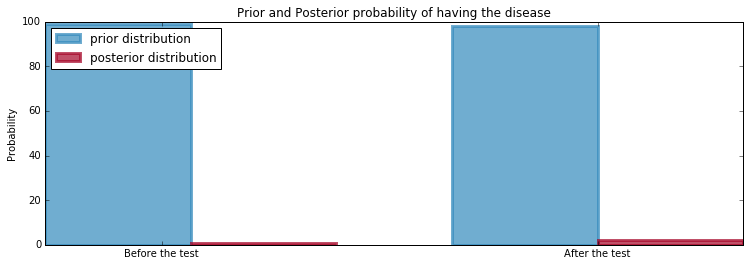

In [23]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [99, 98]
posterior = [1,2]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="posterior distribution",
        lw="3", edgecolor=colours[1])

plt.xticks([0.20, .95], ["Before the test", "After the test"])
plt.title("Prior and Posterior probability of having the disease")
plt.ylabel("Probability")
plt.legend(loc="upper left");

# 2. Gradually getting closer to the truth

Bayes' theorem offers the possibility of gradually getting closer to the truth by constantly updating our belief with new evidence. Indeed as soon as you get your posterior it becomes a prior for future uses when new evidence will come into view. 

For instance this graph could represent more than ten years of bayesian updates given yearly information about what  investments the company should make.

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go

title = 'Bayesian Belief-Updating'

labels = ['Technology 1', 'Technology 2', 'Technology 3', 'Technology 4']

colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)', 'rgba(49,130,189, 1)', 'rgba(189,189,189,1)']

mode_size = [8, 8, 12, 8]

line_size = [2, 2, 4, 2]

x_data = [
    [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013],
    [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013],
    [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013],
    [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2013],
]

y_data = [
    [74, 82, 80, 74, 73, 72, 74, 70, 70, 66, 66, 69],
    [45, 42, 50, 46, 36, 36, 34, 35, 32, 31, 31, 28],
    [13, 14, 20, 24, 20, 24, 24, 40, 35, 41, 43, 50],
    [18, 21, 18, 21, 16, 14, 13, 18, 17, 16, 19, 23],
]

traces = []

for i in range(0, 4):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    traces.append(go.Scatter(
        x=[x_data[i][0], x_data[i][11]],
        y=[y_data[i][0], y_data[i][11]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}%'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[11],
                                  xanchor='left', yanchor='middle',
                                  text='{}%'.format(y_trace[11]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Bayesian Belief-Updating',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Where should our company invest? ' +
                                   ' (Yearly Bayesian Update)',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='news-source')

Find the plot here: https://plot.ly/~ludovic/130/ 



**Sources:**  
Davidson-Pilon, C. (2015). Bayesian Methods for Hackers: Probabilistic Programming and Bayesian Inference. Addison-Wesley Professional.

D. Kelleher, J., Mac Namee, B. & D’Arcy, A.  (2015, July). Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies. The MIT Press; 1st Edition.

https://plot.ly/python/line-charts/   